In [1]:
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv'
df = pd.read_csv(url)

In [5]:
print(df.isnull().sum())
df.fillna(0, inplace=True)

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0
...,...,...,...,...,...
161563,2022-04-12,Zimbabwe,247094,0,5460
161564,2022-04-13,Zimbabwe,247160,0,5460
161565,2022-04-14,Zimbabwe,247208,0,5462
161566,2022-04-15,Zimbabwe,247237,0,5462


 Data Exploration and Cleaning

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  object        
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB
None


In [13]:
print(df.head())

        Date      Country  Confirmed  Recovered  Deaths
0 2020-01-22  Afghanistan          0          0       0
1 2020-01-23  Afghanistan          0          0       0
2 2020-01-24  Afghanistan          0          0       0
3 2020-01-25  Afghanistan          0          0       0
4 2020-01-26  Afghanistan          0          0       0


Identify and Handle Outliers/Inconsistencies

In [16]:
print((df[['Confirmed', 'Deaths', 'Recovered']] < 0).sum())

Confirmed    0
Deaths       0
Recovered    0
dtype: int64


In [18]:
from scipy.stats import zscore
df['zscore'] = zscore(df['Confirmed'])
df = df[df['zscore'].abs() <= 3]

Visualize Global Trends

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

Plot the total number of confirmed cases, deaths, and recoveries over time

C:\Users\bhaka\AppData\Local\Temp\ipykernel_2080\3694291372.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  global_data = df.groupby('Date').sum().reset_index()


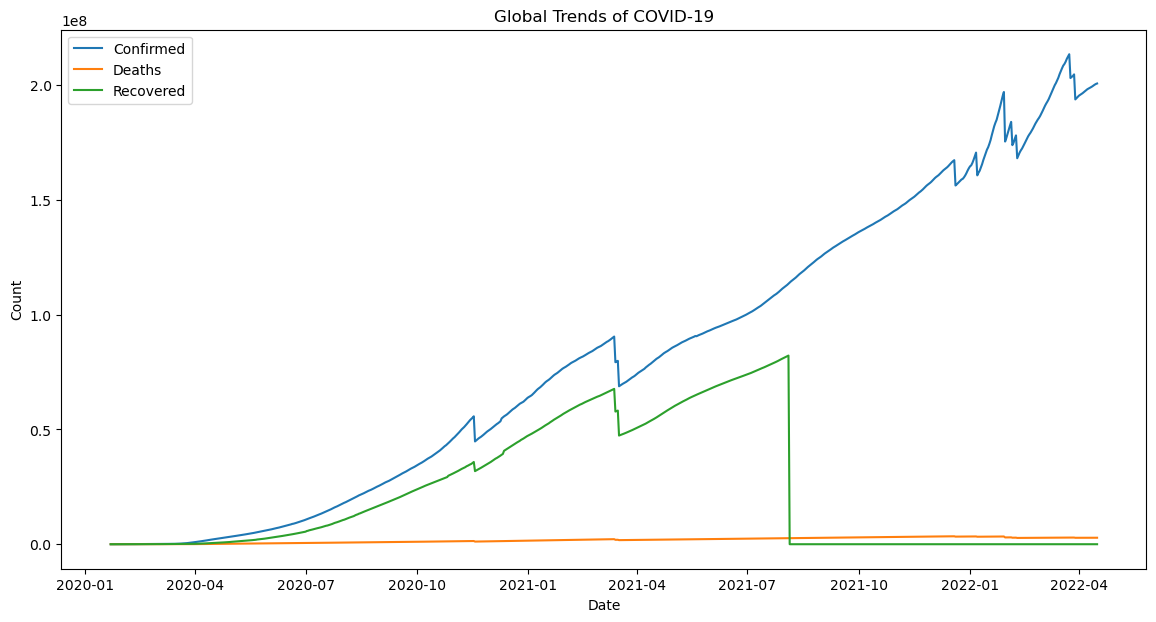

In [26]:
global_data = df.groupby('Date').sum().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(data=global_data, x='Date', y='Confirmed', label='Confirmed')
sns.lineplot(data=global_data, x='Date', y='Deaths', label='Deaths')
sns.lineplot(data=global_data, x='Date', y='Recovered', label='Recovered')
plt.title('Global Trends of COVID-19')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

Country-Specific Analysis

In [29]:
def plot_country_trends(country):
    country_data = df[df['Country'] == country]
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=country_data, x='Date', y='Confirmed', label='Confirmed')
    sns.lineplot(data=country_data, x='Date', y='Deaths', label='Deaths')
    sns.lineplot(data=country_data, x='Date', y='Recovered', label='Recovered')
    plt.title(f'COVID-19 Trends in {country}')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

Enter a specific county India


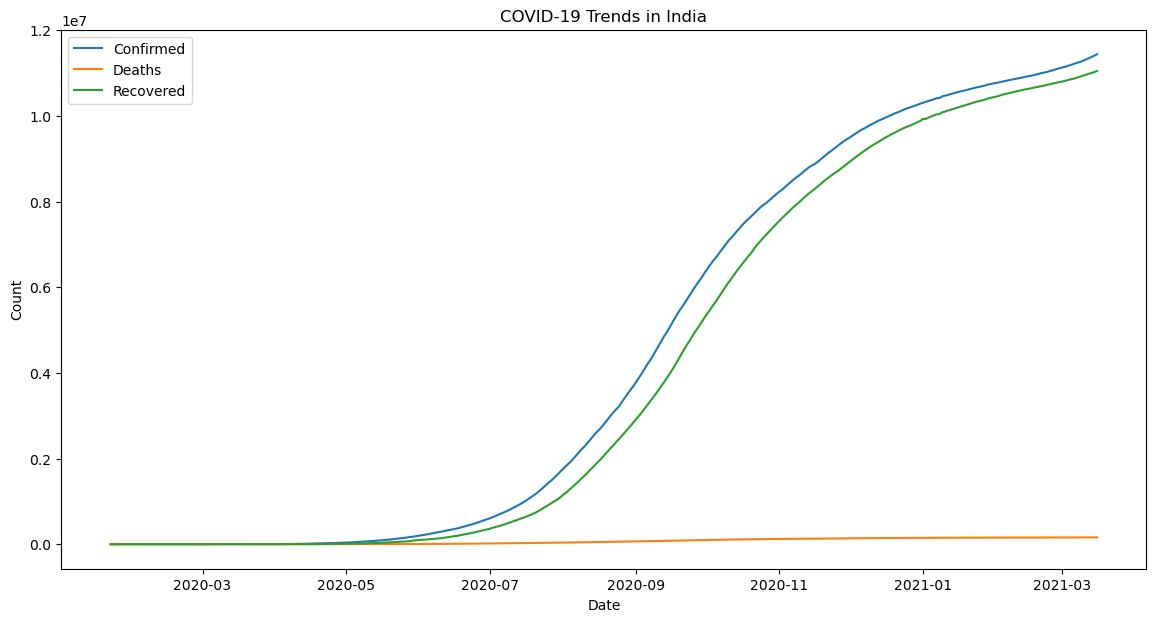

In [31]:
plot_country_trends(input("Enter a specific county"))

In [33]:
def compare_countries_trends(countries):
    plt.figure(figsize=(14, 8))
    for country in countries:
        country_data = df[df['Country'] == country]
        sns.lineplot(x='Date', y='Confirmed', data=country_data, label=f'{country} - Confirmed')
    plt.title('Comparison of COVID-19 Confirmed Cases Among Countries')
    plt.xlabel('Date')
    plt.ylabel('Number of Confirmed Cases')
    plt.legend()
    plt.show()

Enter the countries to compare, separated by commas (e.g., USA, India, Brazil):  India, Pakistan, France


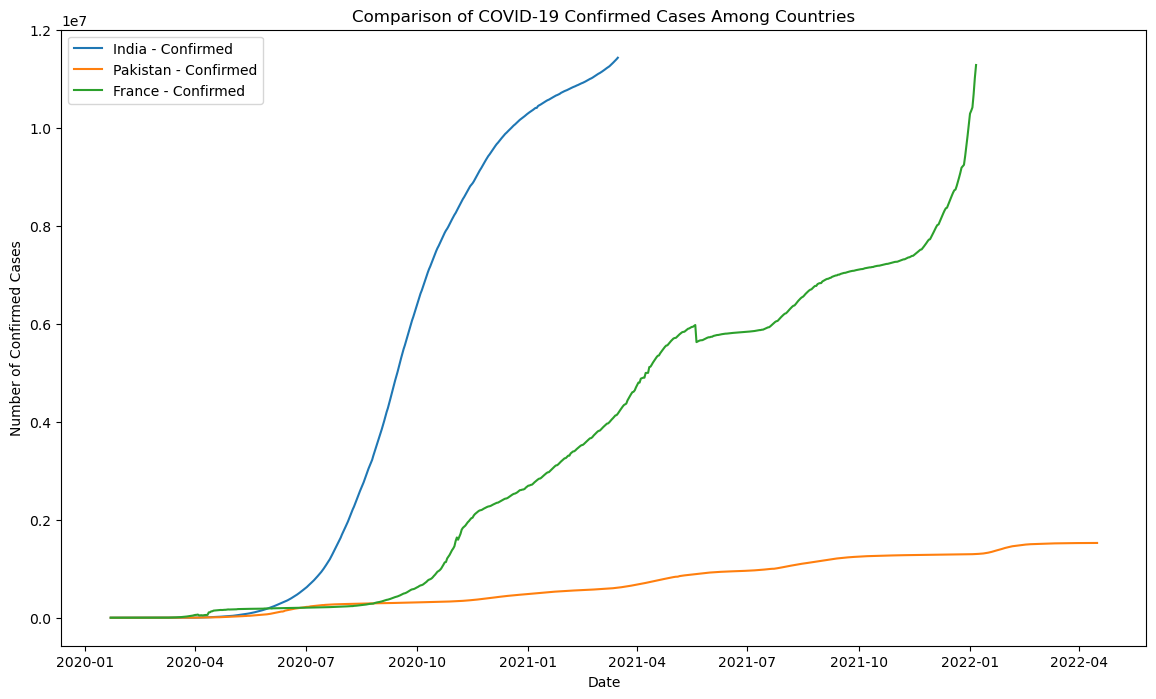

In [35]:
countries_input = input("Enter the countries to compare, separated by commas (e.g., USA, India, Brazil): ")
countries_list = countries_input.split(',')
compare_countries_trends([country.strip() for country in countries_list])

Comparative Analysis

Bar Plots for Total Number of Confirmed Cases, Deaths, and Recoveries

In [47]:
total_counts = df.groupby('Country').max().reset_index()
top_10_countries = total_counts.nlargest(10, 'Confirmed')['Country']
df_top_10 = total_counts[total_counts['Country'].isin(top_10_countries)]


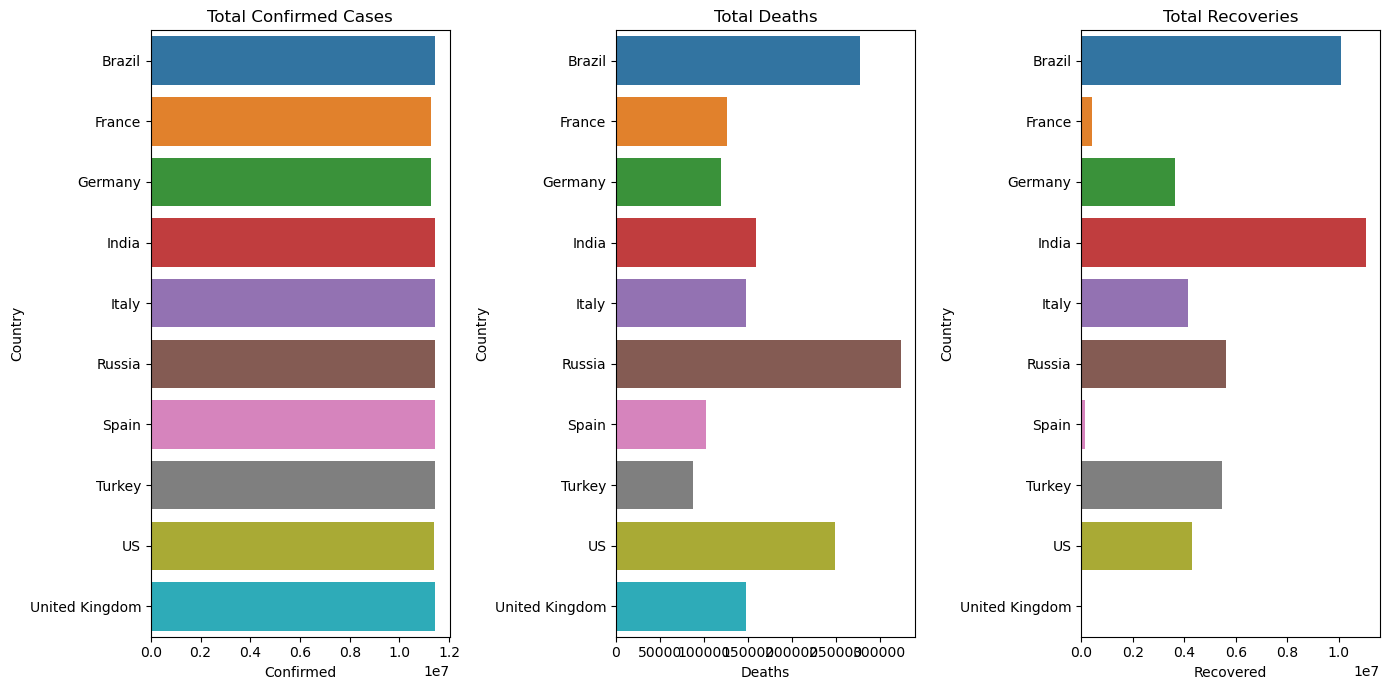

In [49]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
sns.barplot(x='Confirmed', y='Country', data=df_top_10)
plt.title('Total Confirmed Cases')

plt.subplot(1, 3, 2)
sns.barplot(x='Deaths', y='Country', data=df_top_10)
plt.title('Total Deaths')

plt.subplot(1, 3, 3)
sns.barplot(x='Recovered', y='Country', data=df_top_10)
plt.title('Total Recoveries')

plt.tight_layout()
plt.show()

Growth Rate of Cases and Deaths Using Moving Averages

C:\Users\bhaka\AppData\Local\Temp\ipykernel_2080\2451920341.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Confirmed_MA'] = calculate_moving_average(df, 'Confirmed')
C:\Users\bhaka\AppData\Local\Temp\ipykernel_2080\2451920341.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Deaths_MA'] = calculate_moving_average(df, 'Deaths')


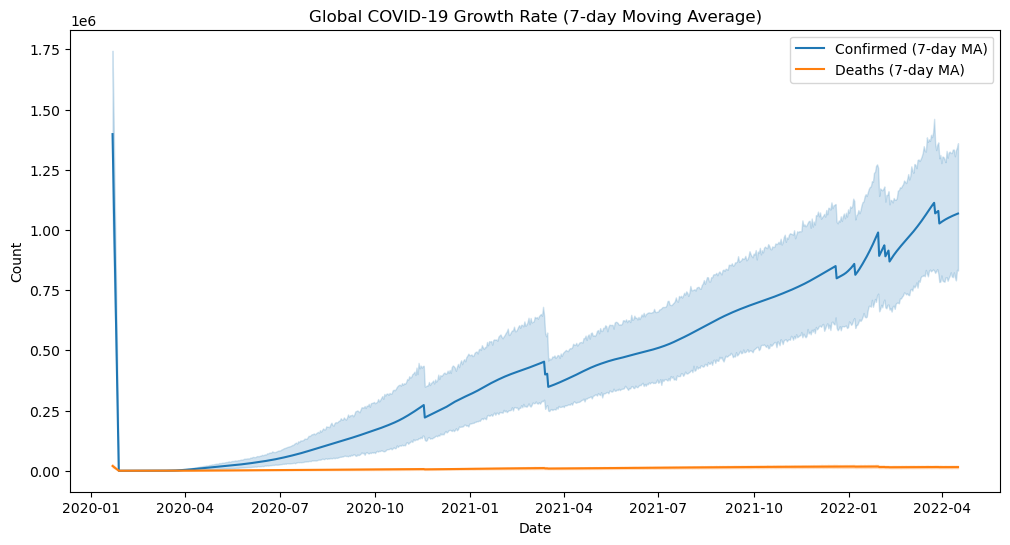

In [52]:
def calculate_moving_average(df, column, window_size=7):
    return df[column].rolling(window=window_size).mean()

df['Confirmed_MA'] = calculate_moving_average(df, 'Confirmed')
df['Deaths_MA'] = calculate_moving_average(df, 'Deaths')
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Confirmed_MA', data=df, label='Confirmed (7-day MA)')
sns.lineplot(x='Date', y='Deaths_MA', data=df, label='Deaths (7-day MA)')
plt.title('Global COVID-19 Growth Rate (7-day Moving Average)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

Correlation Analysis

In [55]:
total_counts = df.groupby('Country').max().reset_index()

In [57]:
data_for_correlation = total_counts[['Confirmed', 'Deaths', 'Recovered']]

In [59]:
correlation_matrix = data_for_correlation.corr()

In [61]:
print(correlation_matrix)

           Confirmed    Deaths  Recovered
Confirmed   1.000000  0.771694   0.700539
Deaths      0.771694  1.000000   0.778392
Recovered   0.700539  0.778392   1.000000


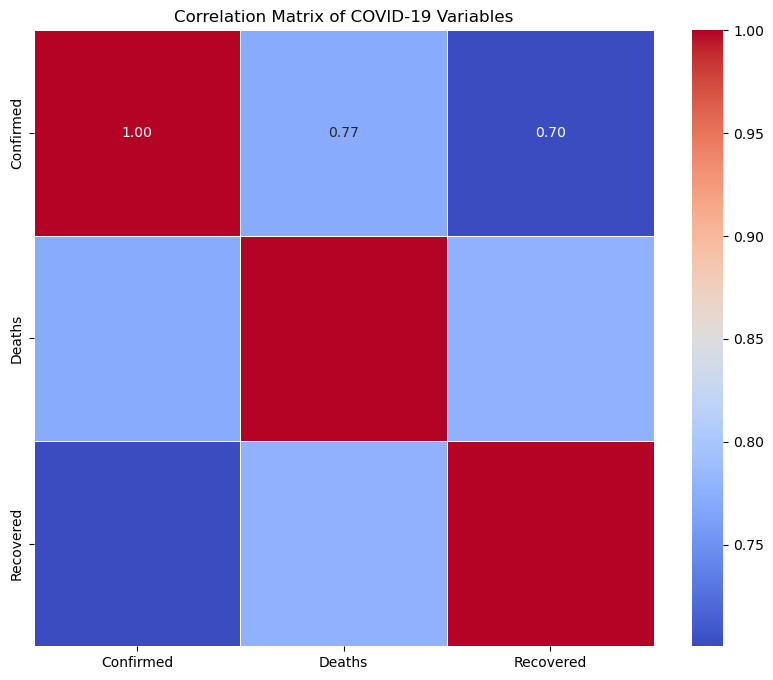

In [63]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of COVID-19 Variables')
plt.show()

Answer following questions visually through data:
1. What is the trend of confirmed cases, deaths, and recoveries globally over time? Draw
plots separately.
2. Which country has the highest number of confirmed cases, deaths, and recoveries as
of the latest date in the dataset?
3. How do the trends of confirmed cases differ between the top 5 most affected
countries?
4. What is the growth rate of confirmed cases, deaths, and recoveries globally?
5. What are the cumulative confirmed cases, deaths, and recoveries for the top 10 most
affected countries?
6. How does the recovery rate compare across different countries?
7. What is the correlation between confirmed cases, deaths, and recoveries globally?
8. How do lockdown measures impact the trend of confirmed cases in different
countries?
9. How does the number of tests conducted relate to the number of confirmed cases in
various countries?
10. What is the distribution of confirmed cases, deaths, and recoveries by continent?

1. What is the trend of confirmed cases, deaths, and recoveries globally over time? Draw
plots separately

C:\Users\bhaka\AppData\Local\Temp\ipykernel_2080\3825547224.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  global_totals = df.groupby('Date').sum().reset_index()


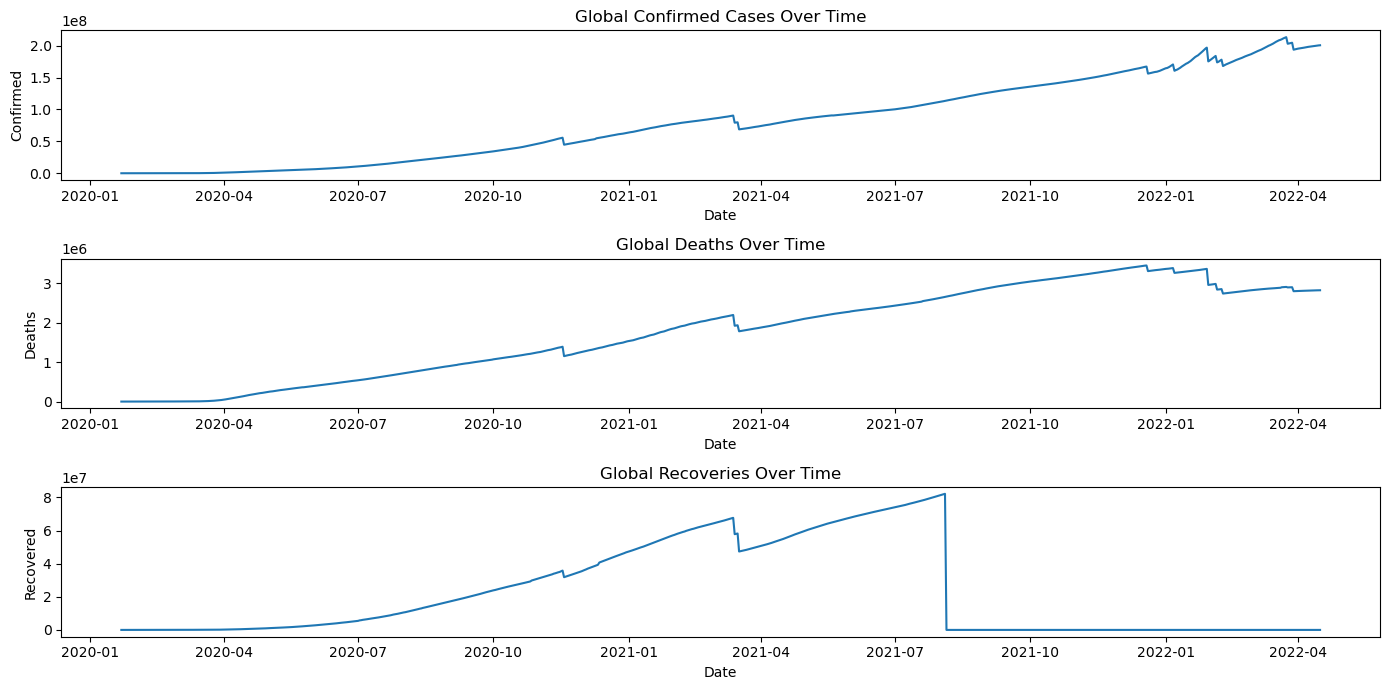

In [66]:
global_totals = df.groupby('Date').sum().reset_index()

# Plot trends
plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
sns.lineplot(x='Date', y='Confirmed', data=global_totals)
plt.title('Global Confirmed Cases Over Time')

plt.subplot(3, 1, 2)
sns.lineplot(x='Date', y='Deaths', data=global_totals)
plt.title('Global Deaths Over Time')

plt.subplot(3, 1, 3)
sns.lineplot(x='Date', y='Recovered', data=global_totals)
plt.title('Global Recoveries Over Time')

plt.tight_layout()
plt.show()

2. Which country has the highest number of confirmed cases, deaths, and recoveries as
of the latest date in the dataset?

In [68]:
# Calculate the latest total number of cases, deaths, and recoveries for each country
latest_totals = df[df['Date'] == df['Date'].max()].groupby('Country').sum().reset_index()

# Identify the country with the highest confirmed cases, deaths, and recoveries
max_confirmed_country = latest_totals.loc[latest_totals['Confirmed'].idxmax()]
max_deaths_country = latest_totals.loc[latest_totals['Deaths'].idxmax()]
max_recoveries_country = latest_totals.loc[latest_totals['Recovered'].idxmax()]

print("Country with highest confirmed cases:", max_confirmed_country['Country'])
print("Country with highest deaths:", max_deaths_country['Country'])
print("Country with highest recoveries:", max_recoveries_country['Country'])


Country with highest confirmed cases: Vietnam
Country with highest deaths: Mexico
Country with highest recoveries: Afghanistan


C:\Users\bhaka\AppData\Local\Temp\ipykernel_2080\1476816249.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  latest_totals = df[df['Date'] == df['Date'].max()].groupby('Country').sum().reset_index()


3. How do the trends of confirmed cases differ between the top 5 most affected
countries?

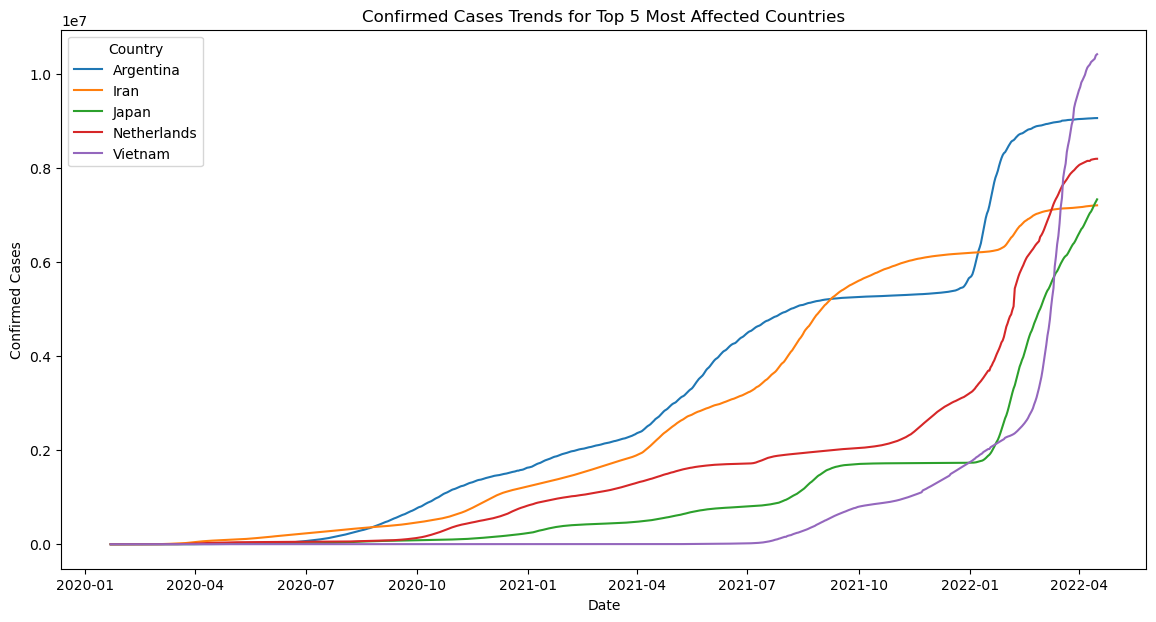

In [70]:
top_5_countries = latest_totals.nlargest(5, 'Confirmed')['Country']

# Filter the dataset for these countries
df_top_5 = df[df['Country'].isin(top_5_countries)]

# Plot trends
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Confirmed', hue='Country', data=df_top_5)
plt.title('Confirmed Cases Trends for Top 5 Most Affected Countries')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend(title='Country')
plt.show()


4. What is the growth rate of confirmed cases, deaths, and recoveries globally?

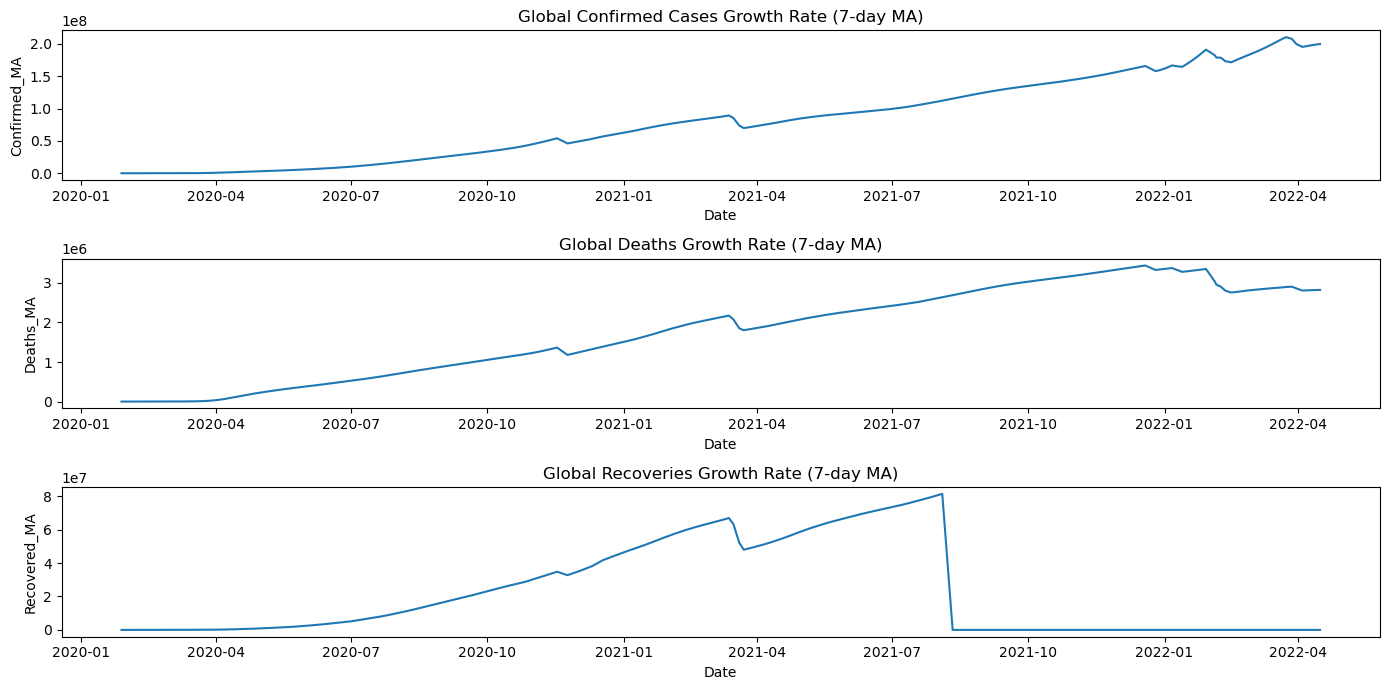

In [72]:
def calculate_moving_average(df, column, window_size=7):
    return df[column].rolling(window=window_size).mean()

# Calculate the moving average for confirmed cases, deaths, and recoveries globally
global_totals['Confirmed_MA'] = calculate_moving_average(global_totals, 'Confirmed')
global_totals['Deaths_MA'] = calculate_moving_average(global_totals, 'Deaths')
global_totals['Recovered_MA'] = calculate_moving_average(global_totals, 'Recovered')

# Plot the growth rate using moving averages
plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
sns.lineplot(x='Date', y='Confirmed_MA', data=global_totals)
plt.title('Global Confirmed Cases Growth Rate (7-day MA)')

plt.subplot(3, 1, 2)
sns.lineplot(x='Date', y='Deaths_MA', data=global_totals)
plt.title('Global Deaths Growth Rate (7-day MA)')

plt.subplot(3, 1, 3)
sns.lineplot(x='Date', y='Recovered_MA', data=global_totals)
plt.title('Global Recoveries Growth Rate (7-day MA)')

plt.tight_layout()
plt.show()


5. What are the cumulative confirmed cases, deaths, and recoveries for the top 10 most
affected countries?

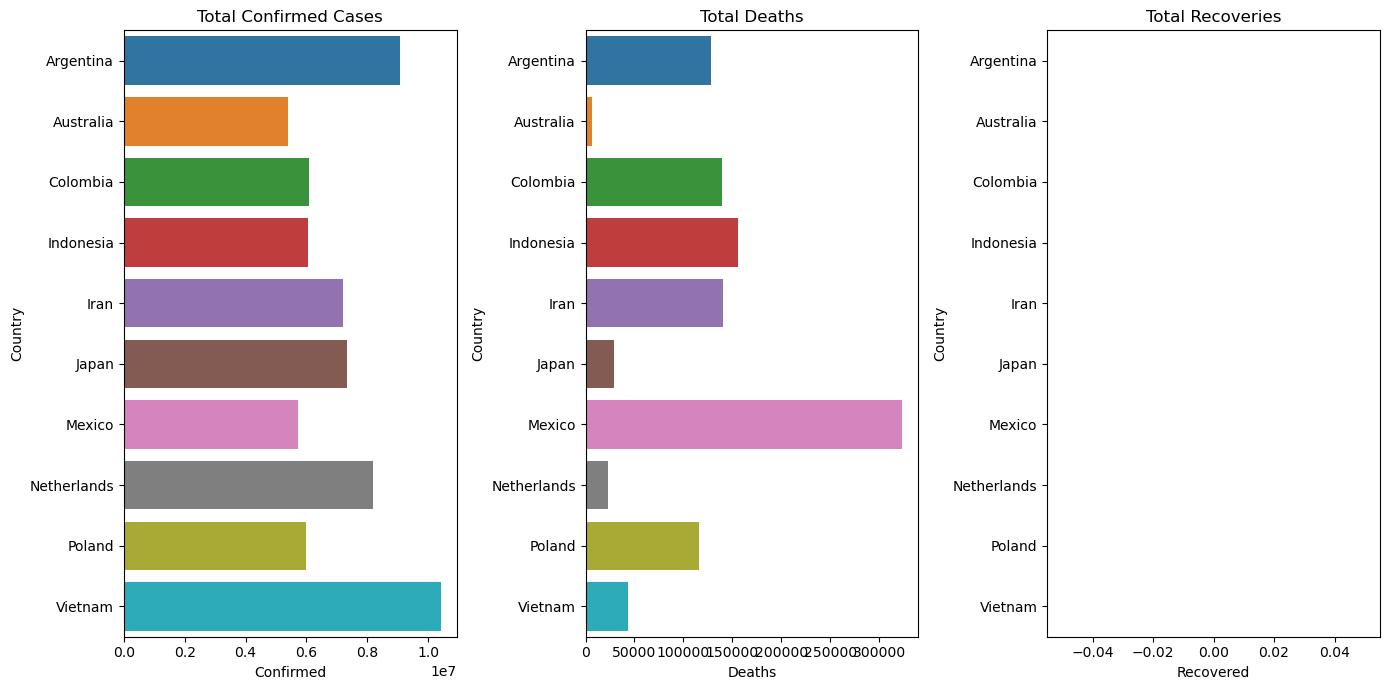

In [74]:
# Get the top 10 countries with the highest confirmed cases
top_10_countries = latest_totals.nlargest(10, 'Confirmed')['Country']

# Filter the dataset for these countries
df_top_10 = latest_totals[latest_totals['Country'].isin(top_10_countries)]

# Create bar plots
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
sns.barplot(x='Confirmed', y='Country', data=df_top_10)
plt.title('Total Confirmed Cases')

plt.subplot(1, 3, 2)
sns.barplot(x='Deaths', y='Country', data=df_top_10)
plt.title('Total Deaths')

plt.subplot(1, 3, 3)
sns.barplot(x='Recovered', y='Country', data=df_top_10)
plt.title('Total Recoveries')

plt.tight_layout()
plt.show()


6. How does the recovery rate compare across different countries?

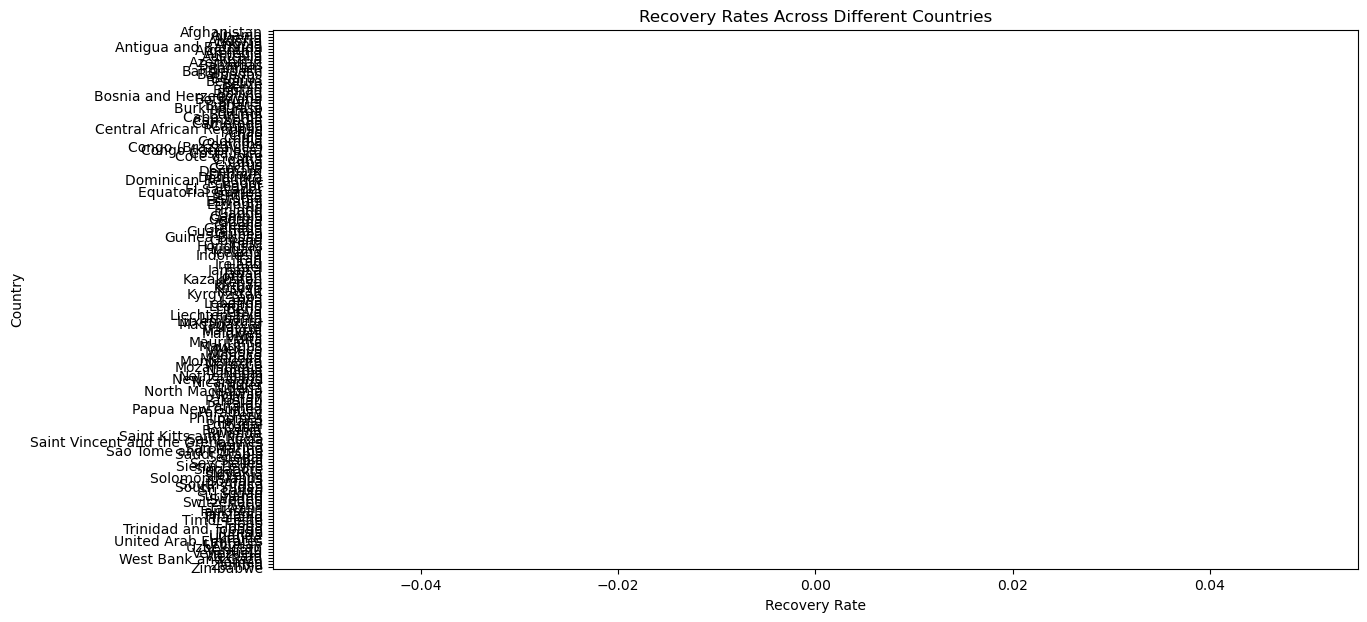

In [82]:
latest_totals['Recovery Rate'] = latest_totals['Recovered'] / latest_totals['Confirmed']

# Filter to include only countries with a significant number of confirmed cases
significant_totals = latest_totals[latest_totals['Confirmed'] > 1000]

# Plot the recovery rates
plt.figure(figsize=(14, 7))
sns.barplot(x='Recovery Rate', y='Country', data=significant_totals)
plt.title('Recovery Rates Across Different Countries')
plt.xlabel('Recovery Rate')
plt.ylabel('Country')
plt.show()


7. What is the correlation between confirmed cases, deaths, and recoveries globally?

D:\Anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


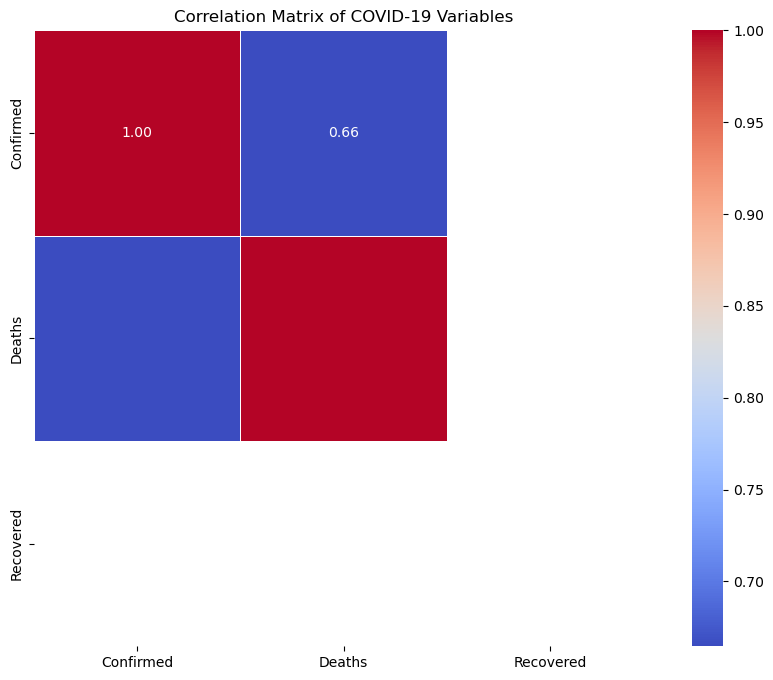

In [84]:

correlation_matrix = latest_totals[['Confirmed', 'Deaths', 'Recovered']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of COVID-19 Variables')
plt.show()


8. How do lockdown measures impact the trend of confirmed cases in different countries?

In [102]:
lockdown_data = pd.DataFrame({
    'Country': ['Italy', 'Spain', 'France', 'Germany', 'United Kingdom'],
    'Lockdown_Start': ['2020-03-09', '2020-03-14', '2020-03-17', '2020-03-22', '2020-03-23'],
    'Lockdown_End': ['2020-05-04', '2020-05-09', '2020-05-11', '2020-05-10', '2020-06-01']
})


In [104]:
# Convert lockdown dates to datetime
lockdown_data['Lockdown_Start'] = pd.to_datetime(lockdown_data['Lockdown_Start'])
lockdown_data['Lockdown_End'] = pd.to_datetime(lockdown_data['Lockdown_End'])

In [106]:
# Merge lockdown data with COVID-19 data
df_with_lockdown = df.merge(lockdown_data, on='Country', how='inner')

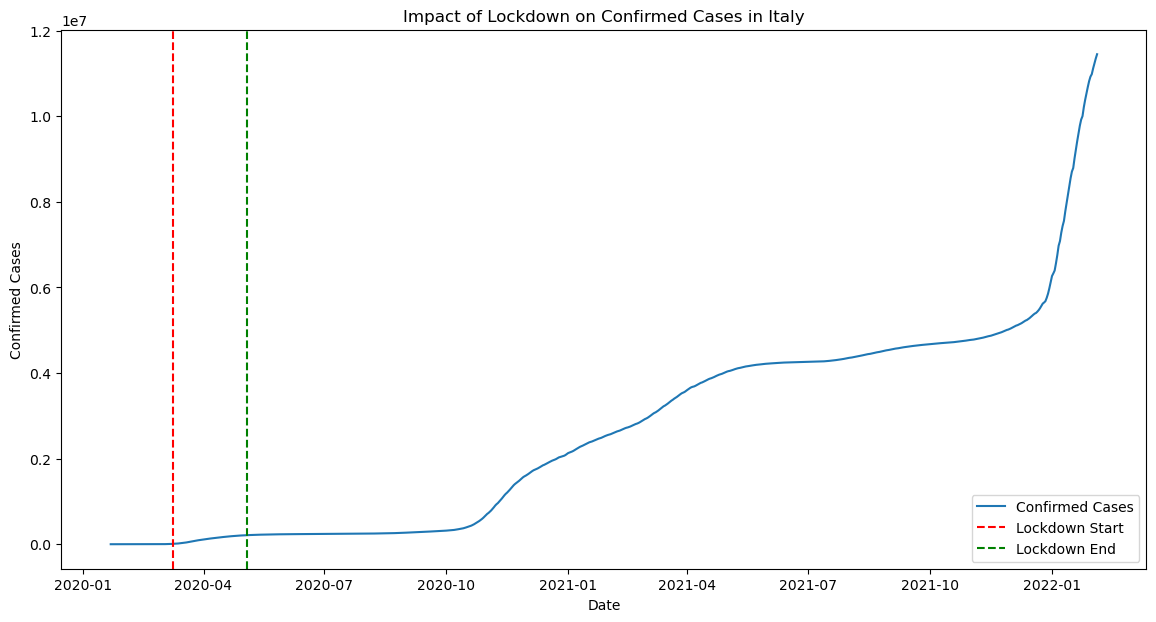

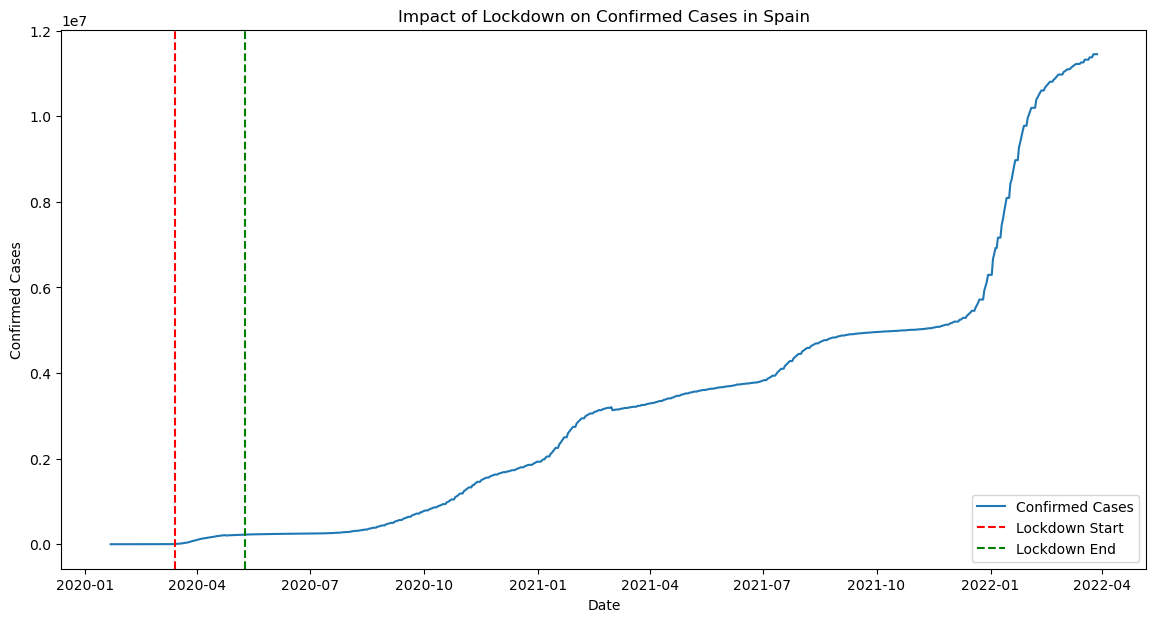

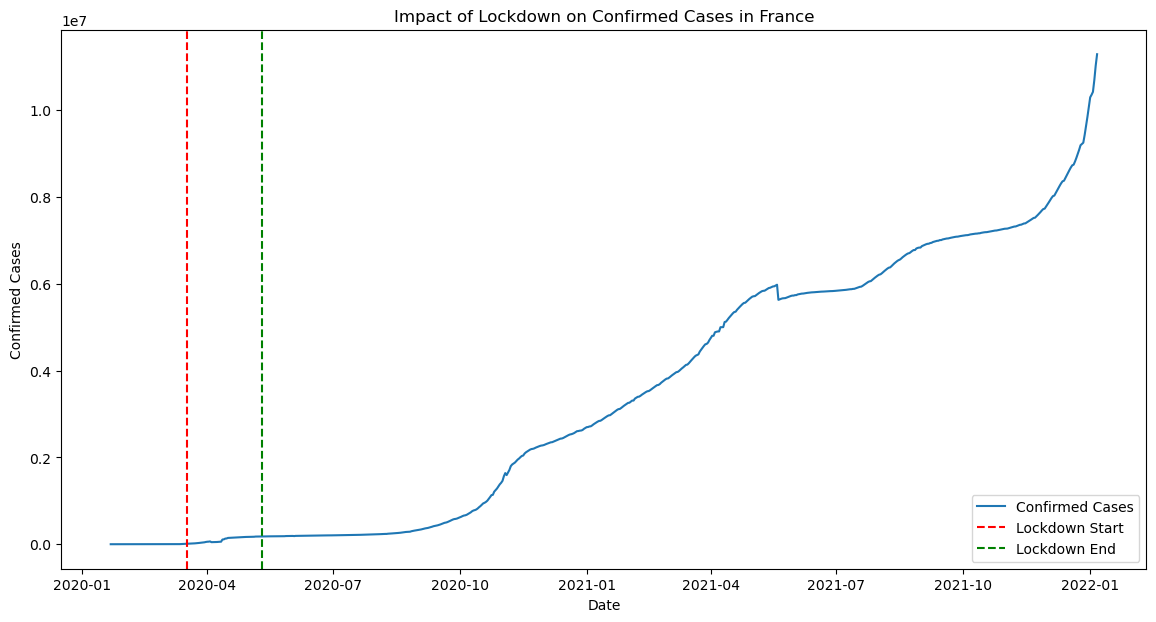

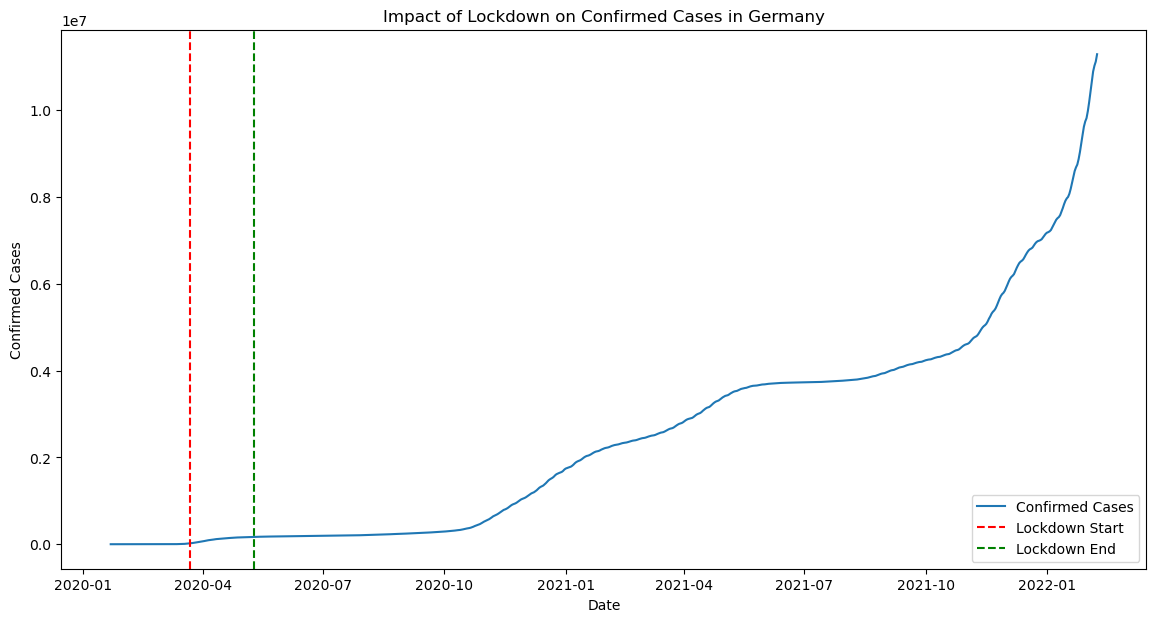

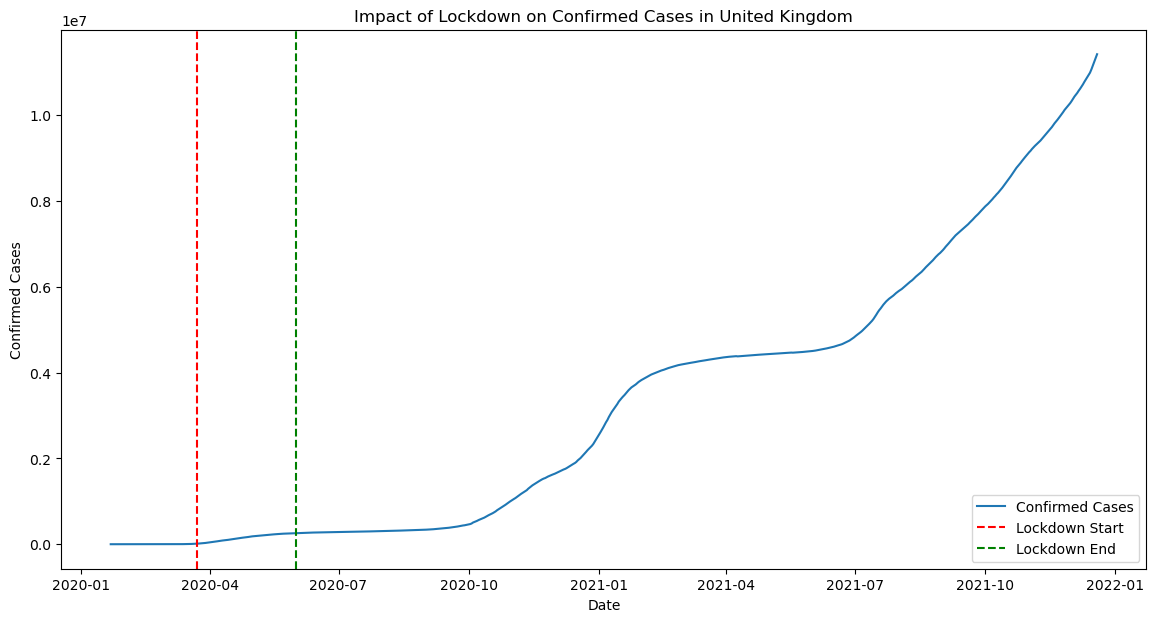

In [108]:
# Plot the trends of confirmed cases before, during, and after the lockdown periods for each country
countries = lockdown_data['Country'].unique()
for country in countries:
    df_country = df_with_lockdown[df_with_lockdown['Country'] == country]
    lockdown_start = df_country['Lockdown_Start'].iloc[0]
    lockdown_end = df_country['Lockdown_End'].iloc[0]
    
    plt.figure(figsize=(14, 7))
    sns.lineplot(x='Date', y='Confirmed', data=df_country, label='Confirmed Cases')
    plt.axvline(lockdown_start, color='red', linestyle='--', label='Lockdown Start')
    plt.axvline(lockdown_end, color='green', linestyle='--', label='Lockdown End')
    plt.title(f'Impact of Lockdown on Confirmed Cases in {country}')
    plt.xlabel('Date')
    plt.ylabel('Confirmed Cases')
    plt.legend()
    plt.show()

9. How does the number of tests conducted relate to the number of confirmed cases in
various countries?

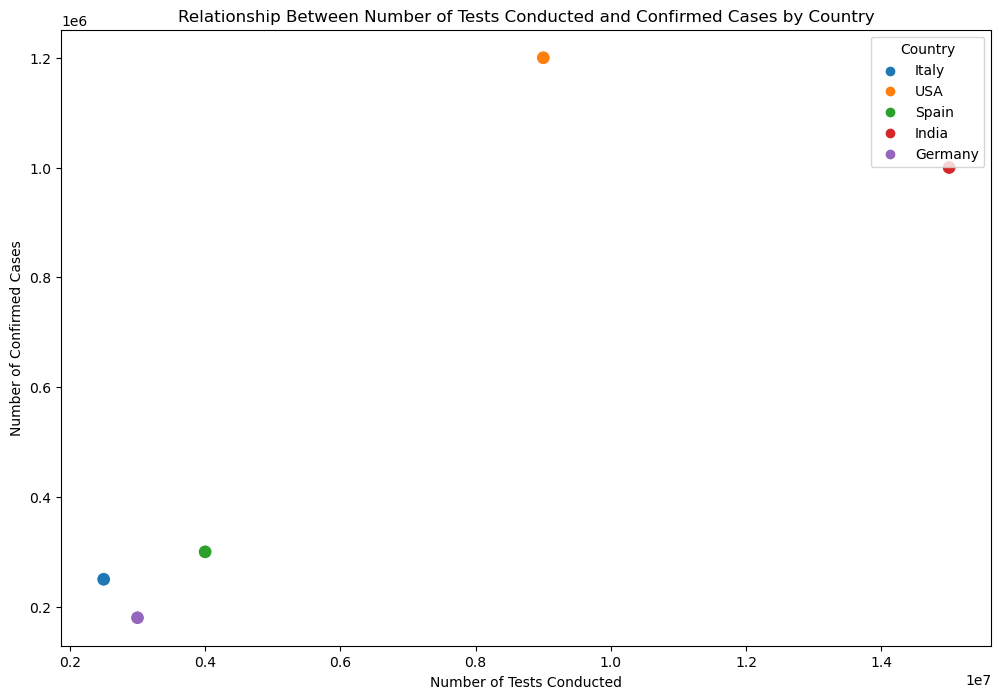

In [128]:
data = pd.DataFrame({
    'Country': ['Italy', 'USA', 'Spain', 'India', 'Germany'],
    'Confirmed': [250000, 1200000, 300000, 1000000, 180000],
    'Tests': [2500000, 9000000, 4000000, 15000000, 3000000]
})

plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Tests', y='Confirmed', hue='Country', s=100)

plt.title('Relationship Between Number of Tests Conducted and Confirmed Cases by Country')
plt.xlabel('Number of Tests Conducted')
plt.ylabel('Number of Confirmed Cases')
plt.legend(title='Country')
plt.show()

In [130]:
correlation = data[['Tests', 'Confirmed']].corr()
print(correlation)

              Tests  Confirmed
Tests      1.000000   0.843285
Confirmed  0.843285   1.000000


10. What is the distribution of confirmed cases, deaths, and recoveries by continent?

In [94]:
#10 
continent_mapping = {
    'USA': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    'Brazil': 'South America',
    'Argentina': 'South America',
    'Chile': 'South America',
    'India': 'Asia',
    'China': 'Asia',
    'Japan': 'Asia',
    'Russia': 'Europe', 
    'Germany': 'Europe',
    'France': 'Europe',
    'United Kingdom': 'Europe',
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',
    'Egypt': 'Africa',
    'Nigeria': 'Africa',
    'South Africa': 'Africa'
}

In [98]:
df['Continent'] = df['Country'].map(continent_mapping)
print(df[df['Continent'].isna()]['Country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Antarctica'
 'Antigua and Barbuda' 'Armenia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Central African Republic' 'Chad' 'Colombia' 'Comoros'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Diamond Princess'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji'
 'Finland' 'Gabon' 'Gambia' 'Georgia' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'Indonesia' 'Iran' 'Iraq' 'Ireland'
 'Israel' 'Italy' 'Jamaica' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Korea, South' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Lao

C:\Users\bhaka\AppData\Local\Temp\ipykernel_2080\4057494230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Continent'] = df['Country'].map(continent_mapping)


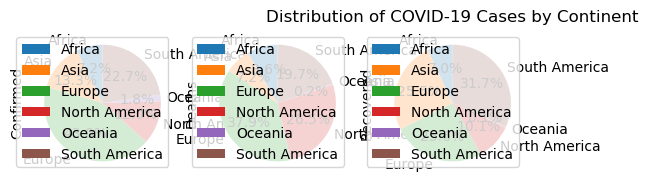

In [100]:
import numpy as np
numeric_data = df.select_dtypes(include=[np.number])
continent_data = numeric_data.groupby(df['Continent']).sum()
continent_data[['Confirmed', 'Deaths', 'Recovered']].plot(kind='pie', subplots=True, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of COVID-19 Cases by Continent')
plt.show()